In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Real_Combine.csv')
df = df.dropna()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [3]:
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [4]:
print("R2(train data): {}".format(regressor.score(X_train, y_train)))
print("R2(test data): {}".format(regressor.score(X_test, y_test)))

R2(train data): 0.8631484052066831
R2(test data): 0.6426103377867369


In [5]:
score=cross_val_score(regressor, X, y, cv=10)
score.mean()

0.19858485019618813

In [6]:
prediction=regressor.predict(X_test)

<AxesSubplot:xlabel='VM', ylabel='Density'>

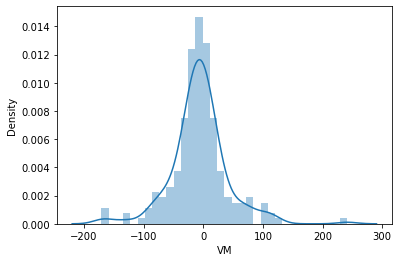

In [7]:
sns.distplot(y_test-prediction)

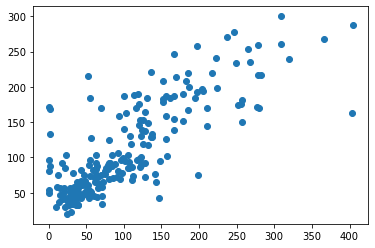

In [8]:
plt.scatter(y_test, prediction)

In [9]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
learning_rate = [0.01, 0.05, 0.1, 0.5, 1.0]
max_depth = [int(x) for x in np.linspace(5,35,num=7)]
validation_fraction = [0.01, 0.05, 1.0]
subsample = [0.7,0.6,0.8]
min_samples_split = [2, 5, 10, 15, 100]

random_grid={
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'subsample':subsample,
    'min_samples_split':min_samples_split,
}
regressor = GradientBoostingRegressor()
gb = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, 
                        scoring='neg_mean_squared_error', n_iter=100, cv=10, verbose=2,
                      random_state=0)

gb.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END learning_rate=0.5, max_depth=30, min_samples_split=5, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=30, min_samples_split=5, n_estimators=200, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=30, min_samples_split=5, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=30, min_samples_split=5, n_estimators=200, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=30, min_samples_split=5, n_estimators=200, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=30, min_samples_split=5, n_estimators=200, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=30, min_samples_split=5, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=30, min_samples_split=5, n_estimators=200, subsample=0.7; total time=   0.8s
[CV] END learni

[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_samples_split=5, n_estimators=300,

[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10, n_estimators=300, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10, n_estimators=300, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10, n_estimators=300, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=10,

[CV] END learning_rate=1.0, max_depth=25, min_samples_split=10, n_estimators=900, subsample=0.6; total time=   2.1s
[CV] END learning_rate=1.0, max_depth=25, min_samples_split=10, n_estimators=900, subsample=0.6; total time=   2.5s
[CV] END learning_rate=1.0, max_depth=25, min_samples_split=10, n_estimators=900, subsample=0.6; total time=   2.0s
[CV] END learning_rate=1.0, max_depth=25, min_samples_split=10, n_estimators=900, subsample=0.6; total time=   2.0s
[CV] END learning_rate=1.0, max_depth=25, min_samples_split=10, n_estimators=900, subsample=0.6; total time=   2.0s
[CV] END learning_rate=1.0, max_depth=25, min_samples_split=10, n_estimators=900, subsample=0.6; total time=   1.9s
[CV] END learning_rate=1.0, max_depth=25, min_samples_split=10, n_estimators=900, subsample=0.6; total time=   2.2s
[CV] END learning_rate=1.0, max_depth=25, min_samples_split=10, n_estimators=900, subsample=0.6; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estim

[CV] END learning_rate=0.01, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=5, min_samples_split=5, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=5, min_samples_split=5, n_estimators

[CV] END learning_rate=1.0, max_depth=35, min_samples_split=100, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=100, n_estimators=400, subsample=0.8; total time=   1.0s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=100, n_estimators=400, subsample=0.8; total time=   1.0s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=100, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=100, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=5, n_e

[CV] END learning_rate=0.1, max_depth=10, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=10, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=10, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=10, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   2.1s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=100, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=100, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=100, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=100, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=100, n_e

[CV] END learning_rate=0.05, max_depth=30, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   2.9s
[CV] END learning_rate=0.05, max_depth=30, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=30, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimat

[CV] END learning_rate=1.0, max_depth=35, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, n_estimators=600, subsample=0.7; total time=   1.4s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, n_estimators=600, subsample=0.7; total time=   1.9s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, n_estimators=600, subsample=0.7; total time=   1.9s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, n_estimators=600, subsample=0.7; total time=   2.0s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, n_estimators=600, subsample=0.7; total time=   1.7s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, n_estimators=600, subsample=0.7; total time=   1.4s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, n_estimators=600, subsample=0.7; total time=   1.3s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, n_estimat

[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10, n_estimators=600, subsample=0.6; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10, n_estimators=600, subsample=0.6; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10, n_estimators=600, subsample=0.6; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10, n_estimators=600, subsample=0.6; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10, n_estimators=600, subsample=0.6; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10, n_estimators=600, subsample=0.6; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10, n_estimators=600, subsample=0.6; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10, n_estimators=600, subsample=0.6; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=10,

[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estimators=900, subsample=0.6; total time=   3.9s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estimators=900, subsample=0.6; total time=   3.8s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estimators=900, subsample=0.6; total time=   4.1s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estimators=900, subsample=0.6; total time=   4.2s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estimators=900, subsample=0.6; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estimators=900, subsample=0.6; total time=   4.1s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estimators=900, subsample=0.6; total time=   4.4s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15, n_estimators=900, subsample=0.6; total time=   3.9s
[CV] END learning_rate=0.05, max_depth=35, min_samples_split=15,

[CV] END learning_rate=0.05, max_depth=25, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=25, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   2.6s
[CV] END learning_rate=1.0, max_depth=35, min_samples_split=15, 

[CV] END learning_rate=0.01, max_depth=15, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=15, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=20, min_samples_split=5, n_estimators=300, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=20, min_samples_split=5, n_estima

[CV] END learning_rate=1.0, max_depth=15, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=1.0, max_depth=15, min_samples_split=15, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=100, n_estimators=700, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=100, n_estimators=700, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=100, n_estima

[CV] END learning_rate=0.01, max_depth=10, min_samples_split=15, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=15, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=15, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=15, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=15, n_estimators=100, subsample=0.6; total time=   0.2s


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'max_depth': [5, 10, 15, 20, 25, 30,
                                                      35],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [10]:
print(gb.best_params_)
print("\n",gb.best_score_)

{'subsample': 0.7, 'n_estimators': 500, 'min_samples_split': 100, 'max_depth': 30, 'learning_rate': 0.01}

 -2579.3061726257715


In [11]:
predictions = gb.predict(X_test)

<AxesSubplot:ylabel='Density'>

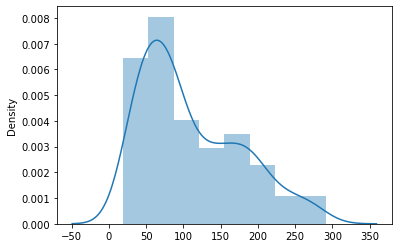

In [12]:
sns.distplot(predictions)

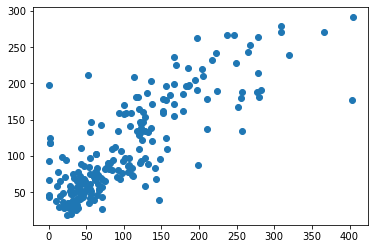

In [13]:
plt.scatter(y_test,predictions)

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 32.35596673294395
MSE: 2227.96216714066
RMSE: 47.20129412569808
